In [1]:
# Dependencies.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd = os.path.abspath(".") # Establish current directory.

# Read our data from csv files into two data frames.

clinicalDf = pd.read_csv(os.path.join(cd, 'clinicaltrial_data.csv'))
mouseDf = pd.read_csv(os.path.join(cd, 'mouse_drug_data.csv'))

In [3]:
clinicalDf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
len(clinicalDf)

1893

In [5]:
mouseDf.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
len(mouseDf)

250

In [7]:
combinedDf = pd.merge(clinicalDf, mouseDf, left_on = 'Mouse ID', right_on = 'Mouse ID', how = 'left')

In [8]:
combinedDf.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo
1905,b879,45,72.555239,2,Stelasyn


In [9]:
len(combinedDf)

1906

In [10]:
drugs = combinedDf[combinedDf.Drug.isin( ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [11]:
len(drugs)

777

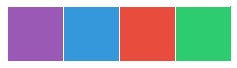

In [12]:
palete1 = ["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"]
sns.set_palette(palete1)
sns.palplot(sns.color_palette())
plt.show()

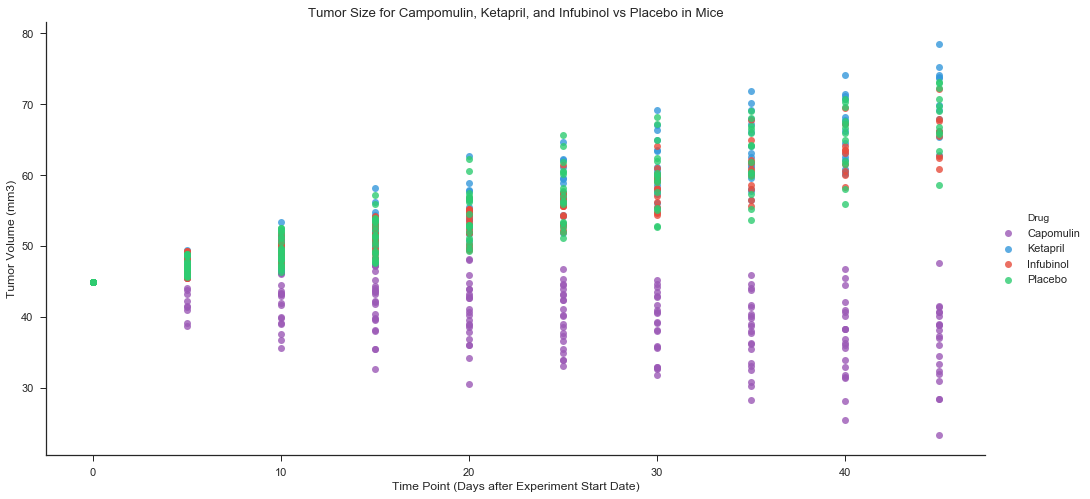

In [13]:

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

tumorWeight1 = sns.lmplot('Timepoint',
                         'Tumor Volume (mm3)',
                         data = drugs,
                         fit_reg = False,
                         hue = 'Drug',
                         scatter = True,
                         size = 7,
                         aspect=2
                        )
plt.title('Tumor Size for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Experiment Start Date)')

plt.show()
# plt.ylabel('Deaths')

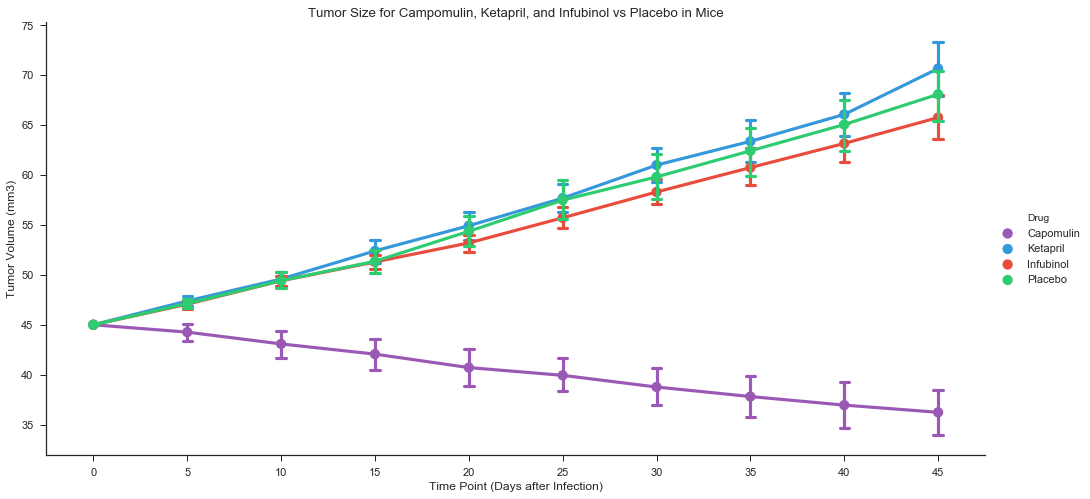

In [14]:
# Draw a pointplot to show pulse as a function of three categorical factors
tumorWeight2 = sns.factorplot(x = "Timepoint",
                   y = "Tumor Volume (mm3)",
                   hue = "Drug",
                   data = drugs,
                   capsize = .1,
                   size = 7,
                   aspect = 2
                  )
plt.title('Tumor Size for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Infection)')
# g.despine(left = True)
plt.show()

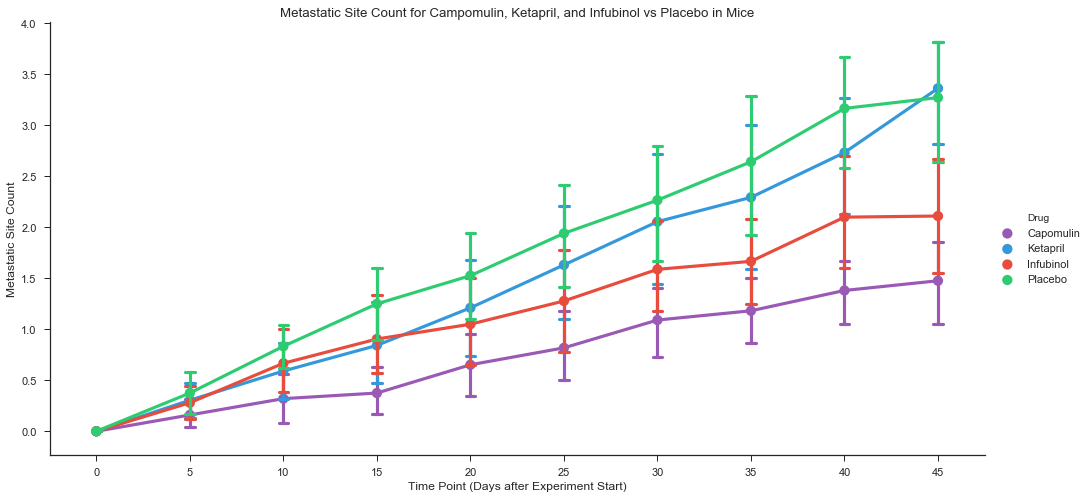

In [15]:
# Draw a pointplot to show pulse as a function of three categorical factors
MetaSites = sns.factorplot(x = "Timepoint",
    y = "Metastatic Sites",
    hue = "Drug",
    data = drugs,
    capsize = .1,
    size = 7,
    aspect = 2
    )
plt.title('Metastatic Site Count for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Experiment Start)')
plt.ylabel('Metastatic Site Count')
plt.show()

In [16]:
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [17]:
survival = pd.DataFrame(drugs.groupby(['Timepoint','Drug']).agg({'Mouse ID' : ['count']})).reset_index()
list(survival)

[('Timepoint', ''), ('Drug', ''), ('Mouse ID', 'count')]

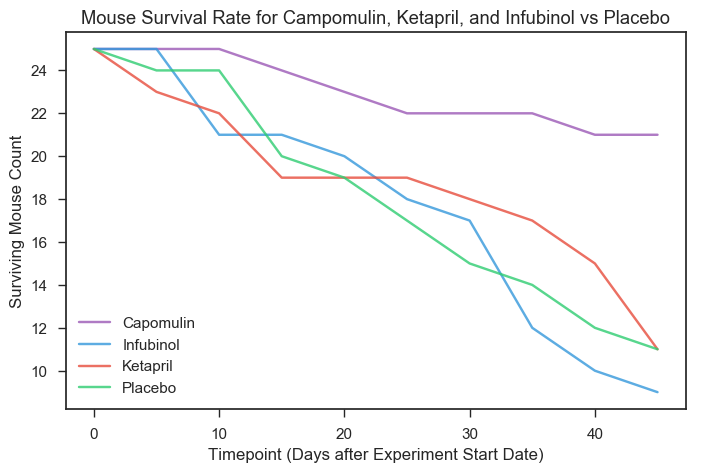

In [18]:
figa = plt.figure(figsize=(8, 5), dpi= 100)
ax1 = figa.add_subplot(1,1,1)

for i in  survival['Drug'].unique():
    series = survival[survival['Drug'] == i]
    ax1.plot(
    series.Timepoint, 
    series['Mouse ID'],
    label = i,
    alpha=.8,
            )
ax1.legend()
ax1.set_xlabel('Timepoint (Days after Experiment Start Date)')
ax1.set_ylabel('Surviving Mouse Count')
ax1.set_title('Mouse Survival Rate for Campomulin, Ketapril, and Infubinol vs Placebo')
plt.show()

In [19]:
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [20]:
# To get the overall change in tumor size by drug, group our original drug dataframe by timepoint and drug name
# aggregating the tumor volume with mean().

tumor = pd.DataFrame(drugs.groupby(['Timepoint','Drug']).agg({'Tumor Volume (mm3)' : ['mean']})).reset_index()

In [21]:
tumor.head()

,Timepoint,Drug,Tumor Volume (mm3)
,,,mean
0,0,Capomulin,45.000000
1,0,Infubinol,45.000000
2,0,Ketapril,45.000000
3,0,Placebo,45.000000
4,5,Capomulin,44.266086


In [22]:
tumor['Drug'].unique()

array(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype=object)

In [23]:
tumorChanges = []
for drug in tumor['Drug'].unique():
    minimum = tumor[tumor['Drug'] == drug]['Timepoint'].idxmin()
    maximum = tumor[tumor['Drug'] == drug]['Timepoint'].idxmax()
    maxWeight = tumor.iloc[maximum]['Tumor Volume (mm3)'].values 
    minWeight = tumor.iloc[minimum]['Tumor Volume (mm3)'].values 
    tumorChanges.append([drug, round(float((maxWeight - minWeight)/minWeight*100), 2)])

In [24]:
tumorChange = pd.DataFrame(tumorChanges, columns=['Drug', 'Percent Change'])
tumorChange

,Drug,Percent Change
0,Capomulin,-19.48
1,Infubinol,46.12
2,Ketapril,57.03
3,Placebo,51.30


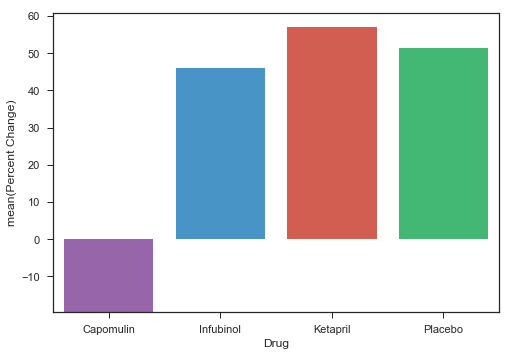

In [25]:
bar1 = sns.barplot('Drug', 'Percent Change', data=tumorChange)
plt.show()

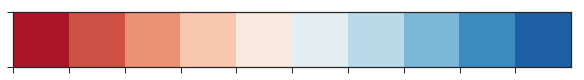

In [26]:
palete2 = sns.color_palette("RdBu", 10)
sns.set_palette(palete2)
sns.palplot(sns.color_palette())
plt.show()

In [27]:
bar1 = sns.barplot('Drug', 'Percent Change', data=tumorChange, hue =0)
plt.show()

TypeError: 'int' object is not iterable